(3, 12, 84, 84)


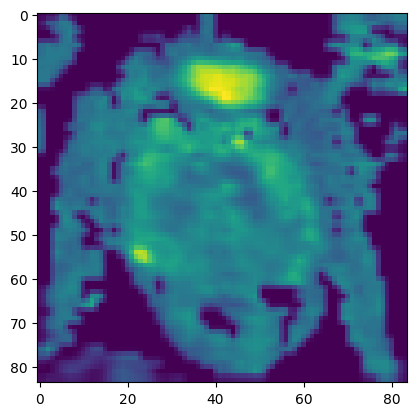

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

IMAGE_PATH = 'data/pca_processed_data/3_modalities_combined/ProstateX-0010_multi_modal_img.npy'
PROSTATE_MASK = 'data/raw/ProstateX-0000/prostate_masks/DWI.npy'

image_data = np.load(IMAGE_PATH)
prostate_mask = np.load(PROSTATE_MASK)
prostate_mask = 1 - prostate_mask

def setup_image_full_resolution(image: np.array, slice: int):
    data = np.transpose(image, (1, 2, 0))
    data = data[:, slice, :]
    data = np.rot90(data, k=3)
    return data

def setup_image(image: np.array, slice: int):
    data = np.transpose(image, (2, 3, 0, 1))
    data = data[:, :, :, slice]
    normalized_image = (data-np.min(data))/(np.max(data)-np.min(data)) * 255
    normalized_image = normalized_image.astype(np.uint8)
    normalized_image = cv2.resize(normalized_image, (384, 384))
    return normalized_image

print(image_data.shape)
plt.imshow(image_data[2, 8, :, :])
plt.savefig('output.png')